In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.feature_selection import mutual_info_regression

# Load the dataset



In [8]:
import pandas as pd
from google.colab import files

# Upload the file
uploaded = files.upload()

# Read the CSV file
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)
df.head()

Saving mental_health_workplace_survey.csv to mental_health_workplace_survey (1).csv


,EmployeeID,Age,Gender,Country,JobRole,Department,YearsAtCompany,WorkHoursPerWeek,RemoteWork,BurnoutLevel,...,CommuteTime,HasMentalHealthSupport,ManagerSupportScore,HasTherapyAccess,MentalHealthDaysOff,SalaryRange,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk
0,1001,50,Male,UK,Sales Associate,HR,14,47,No,3.37,...,117,No,3.15,Yes,8,40K-60K,8.82,6,9.20,0
1,1002,36,Male,Germany,Software Engineer,IT,1,59,Hybrid,7.39,...,8,Yes,4.40,Yes,4,80K-100K,2.80,45,8.46,1
2,1003,29,Non-binary,India,IT Admin,IT,13,59,Hybrid,7.10,...,75,No,3.63,No,6,80K-100K,7.28,7,7.96,1
3,1004,42,Male,Australia,HR Specialist,IT,15,31,Yes,4.18,...,43,Yes,4.50,Yes,9,60K-80K,1.31,11,8.90,0
4,1005,40,Male,Brazil,Customer Support,Support,6,34,Yes,8.28,...,58,Yes,5.51,Yes,6,<40K,1.17,18,8.88,1


In [10]:
df = df.drop(columns=['EmployeeID'])
X = df.drop(columns=['StressLevel'])  # features

Y = df['StressLevel']  # Target variable


In [11]:
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [14]:
print("Data preprocessing complete.")
print(f"Original number of features: {len(df.columns) - 1}")
print(f"Number of features after encoding: {X.shape[1]}")

Data preprocessing complete.
Original number of features: 23
Number of features after encoding: 44


In [15]:
rf_selector = RandomForestRegressor(n_estimators=100, random_state=42)
rf_selector.fit(X_train, y_train)
feature_importances_rf = pd.Series(rf_selector.feature_importances_, index=X.columns).sort_values(ascending=False)


In [16]:
mi_scores = mutual_info_regression(X_train, y_train)
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

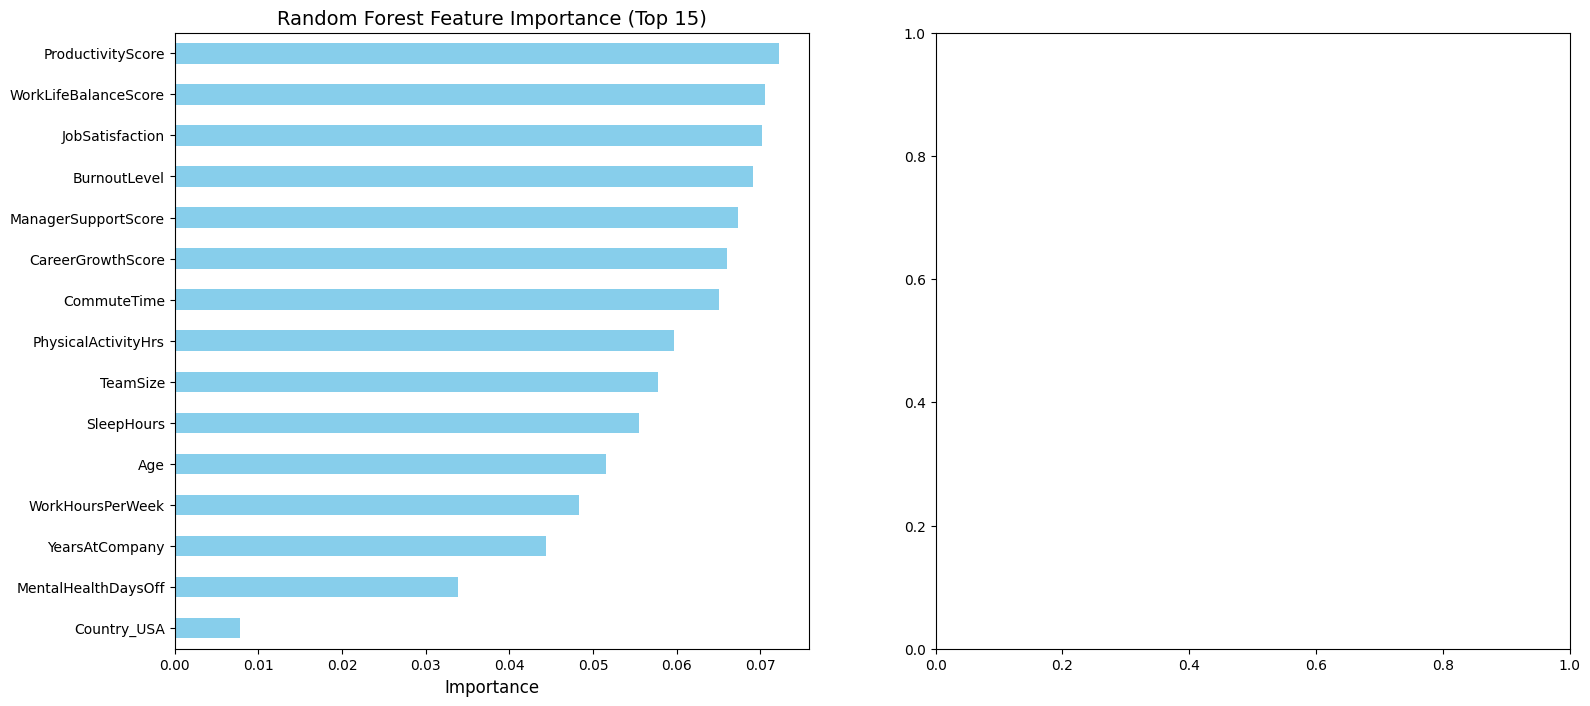

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
feature_importances_rf.head(15).plot(kind='barh', ax=ax[0], color='skyblue')
ax[0].set_title('Random Forest Feature Importance (Top 15)', fontsize=14)
ax[0].set_xlabel('Importance', fontsize=12)
ax[0].invert_yaxis()

In [18]:
mi_scores.head(15).plot(kind='barh', ax=ax[1], color='salmon')
ax[1].set_title('Mutual Information Scores (Top 15)', fontsize=14)
ax[1].set_xlabel('Mutual Information Score', fontsize=12)
ax[1].invert_yaxis()

In [19]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [20]:
def train_and_evaluate(X_train, y_train, X_test, y_test):
    results = {}

    # Decision Tree Regressor
    dt = DecisionTreeRegressor(random_state=42)
    dt.fit(X_train, y_train)
    dt_pred = dt.predict(X_test)
    results['Decision Tree'] = {
        'MAE': mean_absolute_error(y_test, dt_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, dt_pred))
    }

    # Random Forest Regressor
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)
    results['Random Forest'] = {
        'MAE': mean_absolute_error(y_test, rf_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, rf_pred))
    }

    # k-NN Regressor
    knn = KNeighborsRegressor(n_neighbors=5)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    results['k-NN'] = {
        'MAE': mean_absolute_error(y_test, knn_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, knn_pred))
    }

    return results

# Evaluate models on the full dataset
full_results = train_and_evaluate(X_train, y_train, X_test, y_test)
print("Performance on the full dataset:")
for model, metrics in full_results.items():
    print(f"  Model: {model} - MAE: {metrics['MAE']:.4f}, RMSE: {metrics['RMSE']:.4f}")

Performance on the full dataset:
  Model: Decision Tree - MAE: 3.0751, RMSE: 3.7777
  Model: Random Forest - MAE: 2.2824, RMSE: 2.6172
  Model: k-NN - MAE: 2.3904, RMSE: 2.8413
